In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('H1.csv')
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
73,1,152,2015,July,27,2,4,10,2,0,...,No Deposit,243,NULL,0,Contract,67.58,0,0,Canceled,2015-04-03
272,0,45,2015,July,27,2,2,3,2,0,...,No Deposit,8,NULL,0,Contract,79.50,0,0,Check-Out,2015-07-07
303,0,1,2015,July,27,2,0,1,2,0,...,No Deposit,240,NULL,0,Transient,147.00,1,0,Check-Out,2015-07-03
339,0,130,2015,July,27,4,2,6,2,0,...,No Deposit,196,NULL,0,Transient,96.95,1,1,Check-Out,2015-07-12
430,0,37,2015,July,27,1,1,4,1,0,...,No Deposit,241,NULL,0,Transient,97.29,0,1,Check-Out,2015-07-06
529,0,98,2015,July,27,4,2,1,2,0,...,No Deposit,8,NULL,0,Transient,71.55,1,0,Check-Out,2015-07-07
756,0,150,2015,July,27,2,2,4,2,0,...,No Deposit,156,NULL,0,Contract,55.68,0,0,Check-Out,2015-07-08
874,0,157,2015,July,27,4,4,6,2,0,...,No Deposit,156,NULL,0,Contract,55.68,0,0,Check-Out,2015-07-14
1182,0,1,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,270,0,Transient,134.00,0,0,Check-Out,2015-07-02
1279,1,26,2015,July,27,4,2,5,2,2,...,No Deposit,240,NULL,0,Transient,163.00,0,0,Canceled,2015-06-09


In [3]:
IsCanceled = train_df['IsCanceled']
y = IsCanceled

In [4]:
leadtime = train_df['LeadTime'] #1
staysweekendnights = train_df['StaysInWeekendNights'] #2
staysweeknights = train_df['StaysInWeekNights'] #3
adults = train_df['Adults'] #4
children = train_df['Children'] #5
babies = train_df['Babies'] #6
isrepeatedguest = train_df['IsRepeatedGuest'] #11
previouscancellations = train_df['PreviousCancellations'] #12
previousbookingsnotcanceled = train_df['PreviousBookingsNotCanceled'] #13
bookingchanges = train_df['BookingChanges'] #16
agent = train_df['Agent'] #18
company = train_df['Company'] #19
dayswaitinglist = train_df['DaysInWaitingList'] #20
adr = train_df['ADR'] #22
rcps = train_df['RequiredCarParkingSpaces'] #23
totalsqr = train_df['TotalOfSpecialRequests'] #24

In [5]:
# Categorical variables
mealcat=train_df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)

In [6]:
x = np.column_stack((leadtime,staysweekendnights,staysweeknights,adults,children,babies,mealcat,countrycat,marketsegmentcat,distributionchannelcat,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtypecat,assignedroomtypecat,bookingchanges,deposittypecat,dayswaitinglist,customertypecat,adr,rcps,totalsqr,reservationstatuscat))
x = sm.add_constant(x, prepend=True)

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.04070268 0.0052648  0.00701335 0.00396219 0.00806383
 0.00075091 0.00614394 0.05941394 0.03322725 0.01097485 0.01110851
 0.00733542 0.00147088 0.0076557  0.01338097 0.00640656 0.03391769
 0.0010779  0.018724   0.01788529 0.06105368 0.0082012  0.63626446]


In [8]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

,extratrees
0,0.000000
6,0.000751
18,0.001078
13,0.001471
4,0.003962
2,0.005265
7,0.006144
16,0.006407
3,0.007013
12,0.007335


In [9]:
y1 = y
x1 = np.column_stack((leadtime,countrycat,deposittypecat))
x1 = sm.add_constant(x1, prepend=True)

In [10]:
y1

0        0
1        0
2        1
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    0
19999    0
Name: IsCanceled, Length: 20000, dtype: int64

In [11]:
x1

array([[  1.,  80.,  10.,   0.],
       [  1.,  76.,  81.,   0.],
       [  1.,  81.,  39.,   0.],
       ...,
       [  1.,  98.,  83.,   0.],
       [  1., 139.,  83.,   0.],
       [  1.,  46.,  83.,   0.]])

In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x1_train,y1_train)))
print("Test set score: {:.3f}".format(logreg.score(x1_test,y1_test)))

Training set score: 0.699
Test set score: 0.699


/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596755
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             IsCanceled   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19996
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:                  0.1391
Time:                        23:58:55   Log-Likelihood:                -11935.
converged:                       True   LL-Null:                       -13863.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1417      0.050    -43.216      0.000      -2.239      -2.045
x1             0.0055      0.

In [14]:
pr = logreg.predict(x1_test)
pr

array([1, 0, 1, ..., 1, 1, 0])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,pr))
print(classification_report(y1_test,pr))

[[1898  633]
 [ 874 1595]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.72      2531
           1       0.72      0.65      0.68      2469

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.70      0.70      0.70      5000



In [16]:
pr = logreg.predict(x1_test)
pr

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
x1_test

array([[  1., 275.,  83.,   1.],
       [  1., 129.,  39.,   0.],
       [  1., 272.,  36.,   0.],
       ...,
       [  1., 136.,  83.,   0.],
       [  1., 162.,  83.,   0.],
       [  1.,   0.,  83.,   0.]])

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y1_test,logreg.decision_function(x1_test))

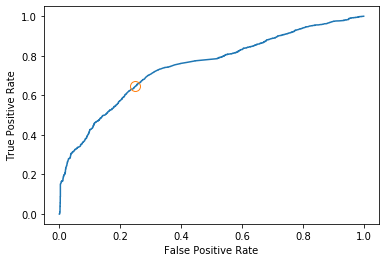

In [19]:
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [20]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(x1, y1)  
prclf = clf.predict(x1_test)
prclf

array([1, 0, 0, ..., 1, 1, 0])

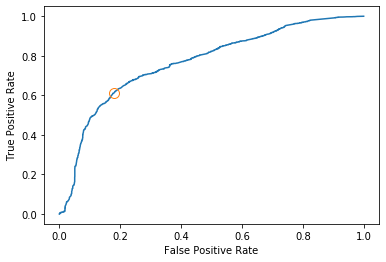

In [21]:
falseposc,trueposc,thresholdsc=roc_curve(y1_test,clf.decision_function(x1_test))
plt.plot(falseposc,trueposc,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholdsc))
plt.plot(falseposc[cutoff],trueposc[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [22]:
print(confusion_matrix(y1_test,prclf))
print(classification_report(y1_test,prclf))

[[2085  446]
 [ 963 1506]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.75      2531
           1       0.77      0.61      0.68      2469

    accuracy                           0.72      5000
   macro avg       0.73      0.72      0.71      5000
weighted avg       0.73      0.72      0.71      5000



In [23]:
h2data = pd.read_csv('H2.csv')
a=h2data.head()
a

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2017,April,14,3,1,1,2,0.0,...,No Deposit,9,NULL,0,Transient,99.00,0,0,Canceled,2017-02-23
1,0,9,2017,March,12,23,1,3,2,0.0,...,No Deposit,7,NULL,0,Transient,190.40,0,1,Check-Out,2017-03-27
2,0,39,2015,August,33,10,1,1,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,62.00,0,0,Check-Out,2015-08-12
3,0,4,2017,February,7,17,1,2,2,0.0,...,No Deposit,28,NULL,0,Contract,68.00,0,0,Check-Out,2017-02-20
4,1,222,2016,July,28,6,1,4,2,0.0,...,No Deposit,9,NULL,0,Contract,90.95,0,1,Canceled,2015-12-14


In [24]:
type(h2data)

pandas.core.frame.DataFrame

In [25]:
export_csv = h2data.to_csv (r'/media/veracrypt9/a_documents/group b/projects/1 hotel project/dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [26]:
t_leadtime = h2data['LeadTime'] #1
t_staysweekendnights = h2data['StaysInWeekendNights'] #2
t_staysweeknights = h2data['StaysInWeekNights'] #3
t_adults = h2data['Adults'] #4
t_children = h2data['Children'] #5
t_babies = h2data['Babies'] #6
t_isrepeatedguest = h2data['IsRepeatedGuest'] #11
t_previouscancellations = h2data['PreviousCancellations'] #12
t_previousbookingsnotcanceled = h2data['PreviousBookingsNotCanceled'] #13
t_bookingchanges = h2data['BookingChanges'] #16
t_agent = h2data['Agent'] #18
t_company = h2data['Company'] #19
t_dayswaitinglist = h2data['DaysInWaitingList'] #20
t_adr = h2data['ADR'] #22
t_rcps = h2data['RequiredCarParkingSpaces'] #23
t_totalsqr = h2data['TotalOfSpecialRequests'] #24

In [27]:
# Categorical variables
t_mealcat=h2data.Meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=h2data.DistributionChannel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=h2data.ReservedRoomType.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=h2data.AssignedRoomType.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=h2data.ReservationStatus.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)

In [28]:
a = np.column_stack((t_leadtime,t_countrycat,t_deposittypecat))
a = sm.add_constant(a, prepend=True)
IsCanceled = h2data['IsCanceled']
b = IsCanceled
b=b.values

In [29]:
prh2 = clf.predict(a)
prh2

array([0, 0, 1, ..., 0, 1, 0])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(b,prh2))
print(classification_report(b,prh2))

[[5654 1350]
 [2038 2958]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      7004
           1       0.69      0.59      0.64      4996

    accuracy                           0.72     12000
   macro avg       0.71      0.70      0.70     12000
weighted avg       0.71      0.72      0.71     12000



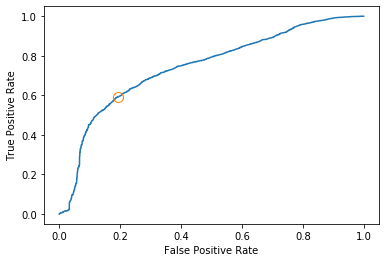

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(b,clf.decision_function(a))
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [32]:
metrics.auc(falsepos, truepos)

0.7437825188763232